# 최적화
최적화 문제는 함수  f 의 값을 최소화하는 변수  x 의 값  $ x^∗ $를 찾는 것이다. 수식으로는 다음처럼 쓴다.
 
$$ x^{\ast} = \arg \min_x f(x)$$
이 값 $ x^∗ $를 최적화 해(solution)라고 한다.



<IPython.core.display.Javascript object>


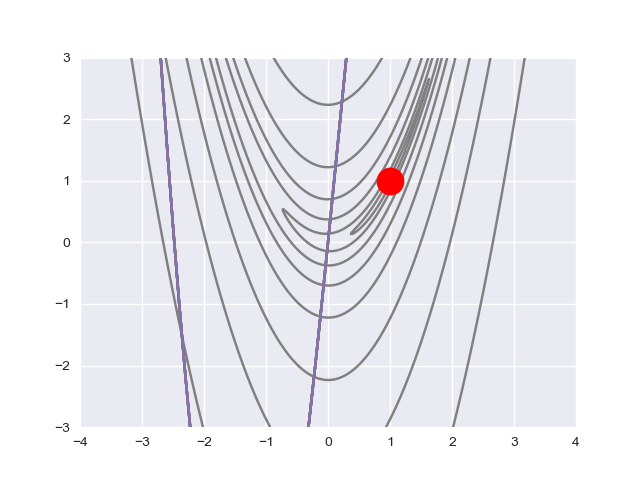

In [1]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.show()

# 그리드 서치(grid search)
 - 가능한  x 의 값을 여러개 넣어 보고 그 중 가장 작은 값을 선택하는 방법
 
# SGD(Steepest Gradient Descent) 방법
 -  기울기 값  g(xk) 만을 이용하여 다음에 시도할 위치를 알아내는 방법
 $$ x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k) $$

# SciPy를 이용한 최적화
- SciPy의 optimize 서브 패키지는 최적화 명령 minimize를 제공

minimize 명령으로 위에서 예로 들었던 1차원 함수를 최적화하면 다음과 같다. minimize 명령은 최적화 결과를 OptimizeResult 클래스 객체로 반환하는데 이 객체는 다음 속성을 가진다.

- x: 최적화 해
- success: 최적화에 성공하면 True를 반환
- status: 종료 상태. 최적화에 성공하면 0을 반환
- message: 메세지 문자열
- fun: x 위치에서의 함수의 값
- jac: x 위치에서의 자코비안(그레디언트) 벡터의 값
- hess: x 위치에서의 헤시안 행렬의 값
- nfev: 목적함수 호출 횟수
- njev: 자코비안 계산 횟수
- nhev: 헤시안 계산 횟수
- nit: x 이동 횟수

In [9]:
import scipy as sp

x0 = 0  # 초기값
def f1(x):
    return (x - 2) ** 2 + 2

result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 1.99999999])


In [10]:
def f1p(x):
    return 2 * (x - 2)

result = sp.optimize.minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 2.])


In [11]:
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 5.2112890141803265e-12
 hess_inv: array([[ 0.49938636,  0.99860874],
       [ 0.99860874,  2.00187364]])
      jac: array([  7.32138760e-05,  -3.35902622e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 55
     njev: 131
   status: 2
  success: False
        x: array([ 0.99999854,  0.9999969 ])


# 2차 도함수를 사용한 방법

minimize 함수에서 method='CG' 또는 method='BFGS' 인수를 사용하여 방법을 지정할 수 있다.

In [14]:
def f3obj(x):
    return x[0] ** 2 + 1.5 * x[1] ** 2
result1 = sp.optimize.minimize(f3obj, (4, 1.6), method='CG', options={'maxiter': 1})

x_cg_1 = result1['x']
x_cg_1


array([ 0.46753248, -0.51948049])

In [24]:
def f_global(x):
    return x**2 + 10 * np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x))


In [25]:

result = sp.optimize.minimize(f_global, 2)
print(result)
x_sol = result['x']
x_sol

      fun: 8.31558557947746
 hess_inv: array([[ 0.11894156]])
      jac: array([  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([ 3.83746713])


array([ 3.83746713])

# 등식 제한 조건이 있는 최적화 문제
- 라그랑주 승수법(Lagrange multiplier)

라그랑주 승수 방법에서는  f(x)f(x) 가 아닌
$$ h(x, \lambda) = f(x) + \sum_{j=1}^M \lambda_j g_j(x) $$
라는 함수를 목적함수로 보고 최적화한다

> 예
$$ f(x_1, x_2) = - \log{x_1} - \log{x_2} \\ x_1, x_2 > 0 $$

$$  x_1+x_2= 1 $$  

$$ \rightarrow h = f + \lambda g = -\log{x_1} - \log{x_2} + \lambda ( x_1 + x_2 - 1 ) $$

$$\rightarrow$$
$$
\begin{eqnarray}
\dfrac{\partial h}{\partial x_1} 
&=& -\dfrac{1}{x_1} + \lambda = 0 \\
\dfrac{\partial h}{\partial x_2} 
&=& -\dfrac{1}{x_2} + \lambda = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&=& x_1 + x_2 - 1 = 0 
\end{eqnarray} $$

$$ x_1 = x_2 = \dfrac{1}{2}, \;\;\; \lambda = 2 $$

SciPy의 optimize 서브패키지에서는 제한 최적화 문제를 풀기위한 fmin_slsqp 명령을 제공한다

In [26]:
def f1logs(x):
    return -np.log(x[0]) - np.log(x[1])

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(f1logs, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3862943611198901
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([ 0.5,  0.5])

# 부등식 제한 조건이 있는 최적화 문제

$$ x^{\ast} = \text{arg} \min_x f(x) \\  
g_j(x) \leq 0 \;\; (j=1, \ldots, M) $$

$$ \rightarrow $$

$$h(x, \lambda) = f(x) + \sum_{j=1}^M \lambda_j g_j(x)$$

- KKT(Karush-Kuhn-Tucker) 조건

(1) 모든 독립 변수에 대한 미분이 0

$$ \dfrac{\partial h(x, \lambda)}{\partial x_i} = 0 $$
 
(2) 모든 라그랑지 승수와 부등식의 곱이 0

$$ \lambda_j \cdot \dfrac{\partial h(x, \lambda)}{\partial \lambda_j} = \lambda \cdot g_j = 0 $$
 
(3) 음수가 아닌 라그랑지 승수

 $$ \lambda_j \geq 0 $$


In [27]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

def ieq_constraint(x):
    return np.atleast_1d(1 - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.605551280732028
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([  9.99999981e-01,   1.89941792e-08])